In [6]:
import pandas as pd
import numpy as np

from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




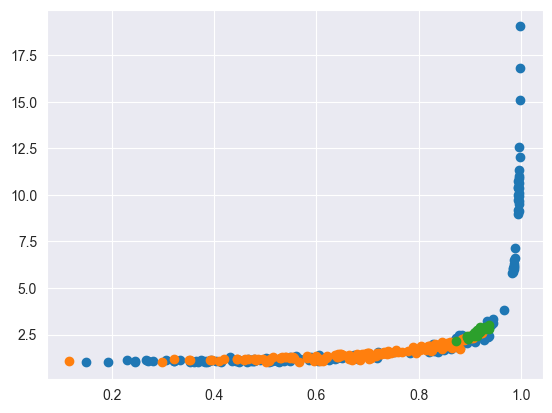

In [45]:
# dbscan clustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import DBSCAN
from matplotlib import pyplot
# define dataset
header = []
header.append("Labels")
for i in range(15):
	header.append("Feature " + str(i + 1))

df = pd.read_csv("leaves.csv", header=None)
df.columns = header

y = df.pop("Labels")
y = np.array(y)
class_samples = df.pop("Feature 1")

unique_labels = np.unique(y)

label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
y = np.vectorize(label_mapping.get)(y)

X = df
X = np.array(X)
# define the model
model = DBSCAN(eps=0.30, min_samples=8)
# fit model and predict clusters
yhat = model.fit_predict(X)
# retrieve unique clusters
clusters = unique(yhat)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(yhat == cluster)
	# create scatter of these samples
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1])
# show the plot
pyplot.show()

K-Means Silhouette Score: 0.0893499747973749
DBI Score: 2.0278672374513165
GMM Silhouette Score: 0.07979635747749882


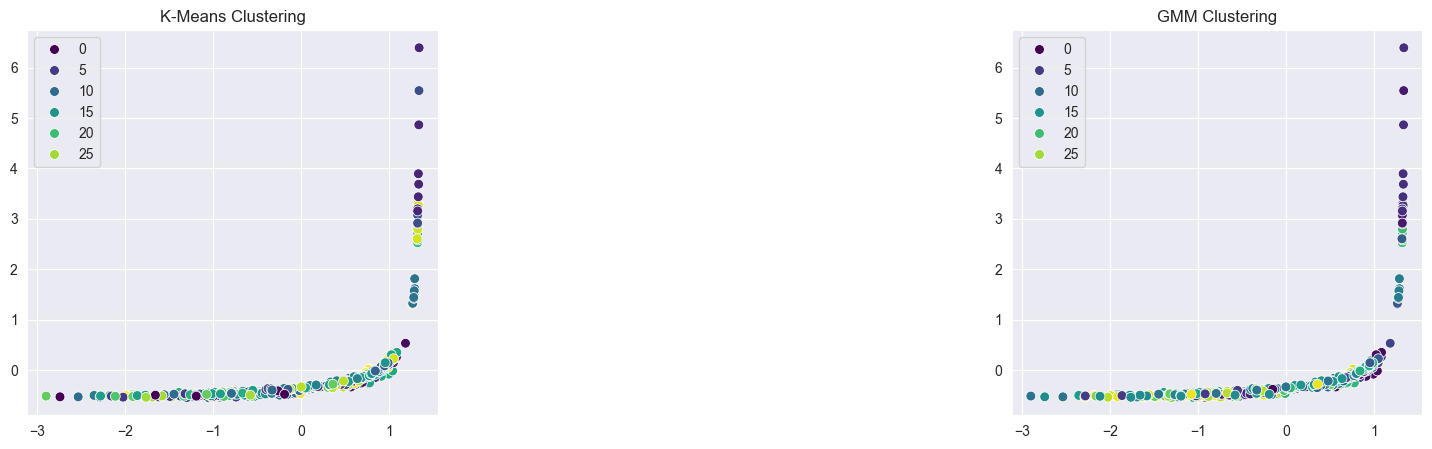

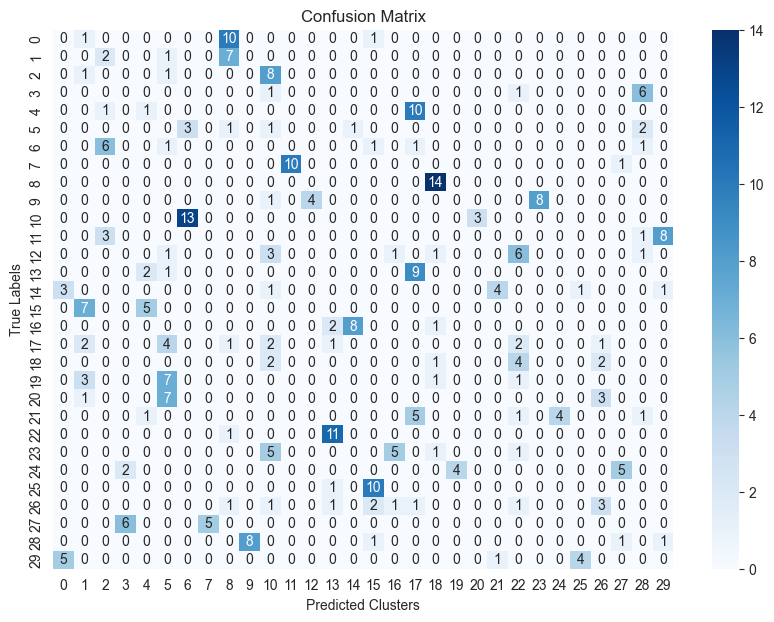

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import davies_bouldin_score

header = []
header.append("label")
header.append("ex_label")

for i in range(14):
    header.append("Feature " + str(i+1))
    
df1 = pd.read_csv("leaves.csv", header=None)
df1.columns = header

df2 = pd.read_csv('leaf_hog_lbp_features.csv')

df = pd.merge(df1, df2, on=['label', 'ex_label'])

y = df.pop("label")
y = np.array(y)
class_samples = df.pop("ex_label")

unique_labels = np.unique(y)

label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
y = np.vectorize(label_mapping.get)(y)

X = df
features = np.array(X)

# Step 2: Preprocess your data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# pca = PCA(n_components=2)
# scaled_features = pca.fit_transform(scaled_features)

# Step 3: Apply clustering algorithms
# K-Means
kmeans = KMeans(n_clusters=30, random_state=0, n_init=20)
kmeans_labels = kmeans.fit_predict(scaled_features)

# DBSCAN
# dbscan = DBSCAN(eps=5, min_samples=20, metric='euclidean')
# dbscan_labels = dbscan.fit_predict(scaled_features)

# GMM
gmm = GaussianMixture(n_components=30, random_state=0)
gmm_labels = gmm.fit_predict(scaled_features)

# Step 4: Evaluate clustering results
# Silhouette Scores
kmeans_silhouette = silhouette_score(scaled_features, kmeans_labels)
kmeans_dbi = davies_bouldin_score(scaled_features, kmeans_labels)
# dbscan_silhouette = silhouette_score(scaled_features, dbscan_labels)
gmm_silhouette = silhouette_score(scaled_features, gmm_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette}\nDBI Score: {kmeans_dbi}')
# print(f'DBSCAN Silhouette Score: {dbscan_silhouette}')
print(f'GMM Silhouette Score: {gmm_silhouette}')

# Visualizing clustering results for the first two features
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=kmeans_labels, palette='viridis', s=50)
plt.title('K-Means Clustering')

# plt.subplot(1, 3, 2)
# sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=dbscan_labels, palette='viridis', s=50)
# plt.title('DBSCAN Clustering')

plt.subplot(1, 3, 3)
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=gmm_labels, palette='viridis', s=50)
plt.title('GMM Clustering')

plt.show()

conf_matrix = confusion_matrix(y, kmeans_labels)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Clusters')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



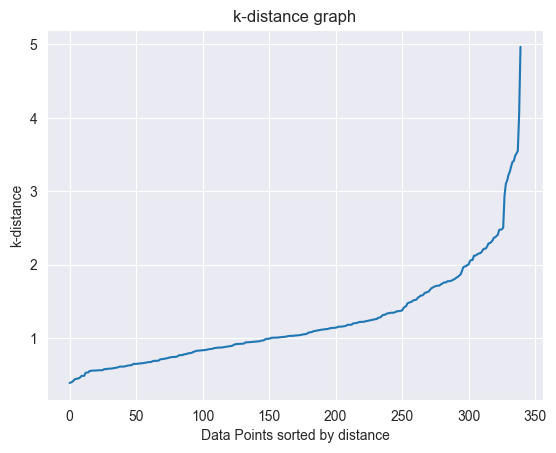

In [43]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

# Calculate the k-distance
k = 5  # choose min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(scaled_features)
distances, indices = neighbors_fit.kneighbors(scaled_features)

# Sort distances to find the "elbow"
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.title('k-distance graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance')
plt.show()

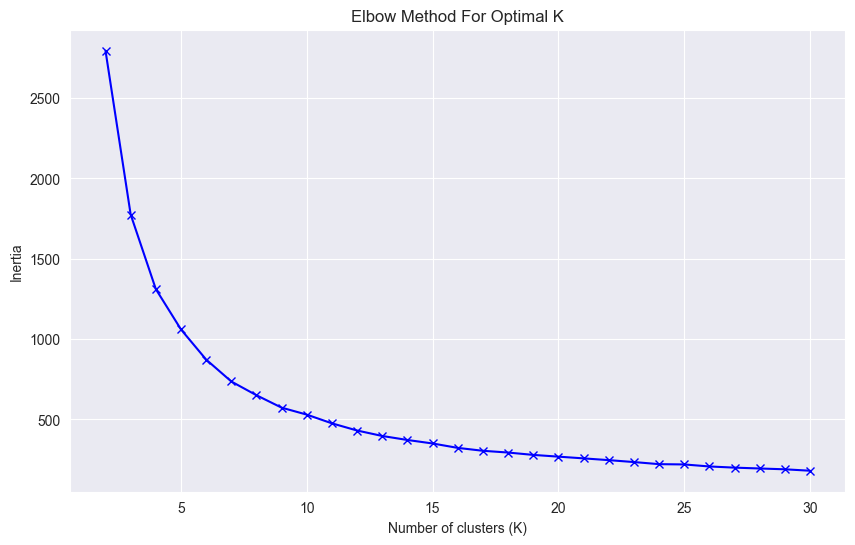

In [63]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K_range = range(2, 31)  # Adjust the range as needed

for K in K_range:
    kmeans = KMeans(n_clusters=K, n_init=20, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(K_range, inertia, 'bx-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

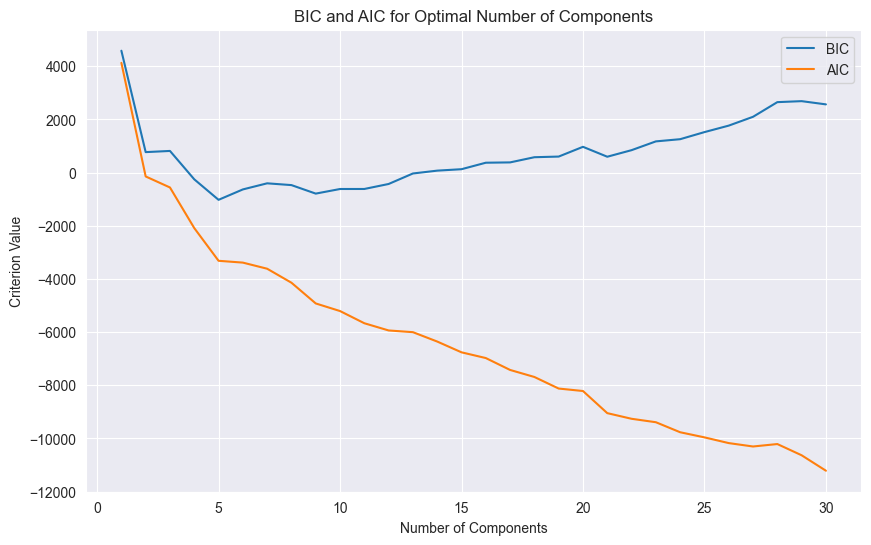

Optimal number of components according to BIC: 5


In [68]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt

n_components = np.arange(1, 31)  # Adjust range as needed
models = [GaussianMixture(n_components=n, random_state=42).fit(scaled_features) for n in n_components]
bics = [model.bic(scaled_features) for model in models]
aics = [model.aic(scaled_features) for model in models]

plt.figure(figsize=(10, 6))
plt.plot(n_components, bics, label='BIC')
plt.plot(n_components, aics, label='AIC')
plt.xlabel('Number of Components')
plt.ylabel('Criterion Value')
plt.title('BIC and AIC for Optimal Number of Components')
plt.legend()
plt.show()

optimal_n_components = n_components[np.argmin(bics)]
print(f'Optimal number of components according to BIC: {optimal_n_components}')

DBSCAN did not find any clusters.
KMeans - Accuracy: 0.6352941176470588, Silhouette Score: 0.08869227933873192


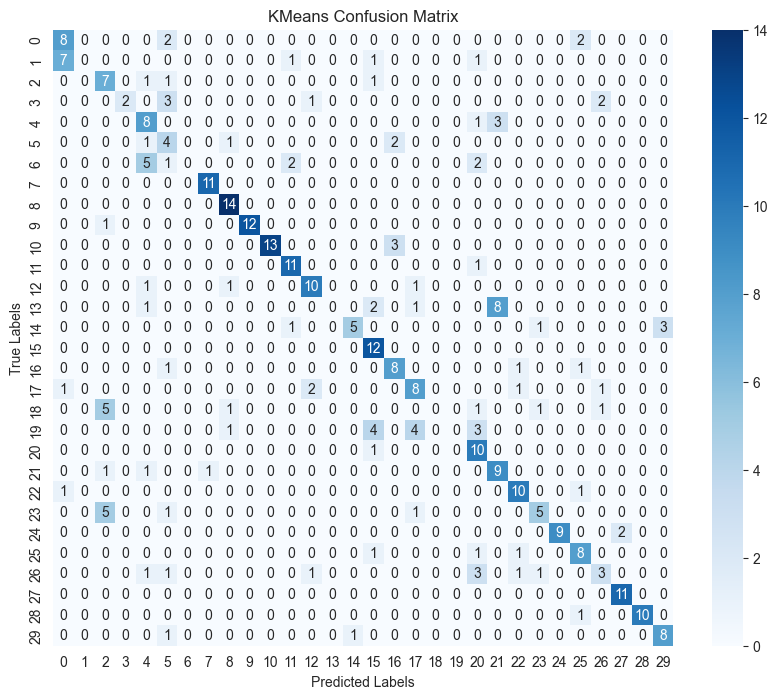

AgglomerativeClustering - Accuracy: 0.6852941176470588, Silhouette Score: 0.09290624713834027


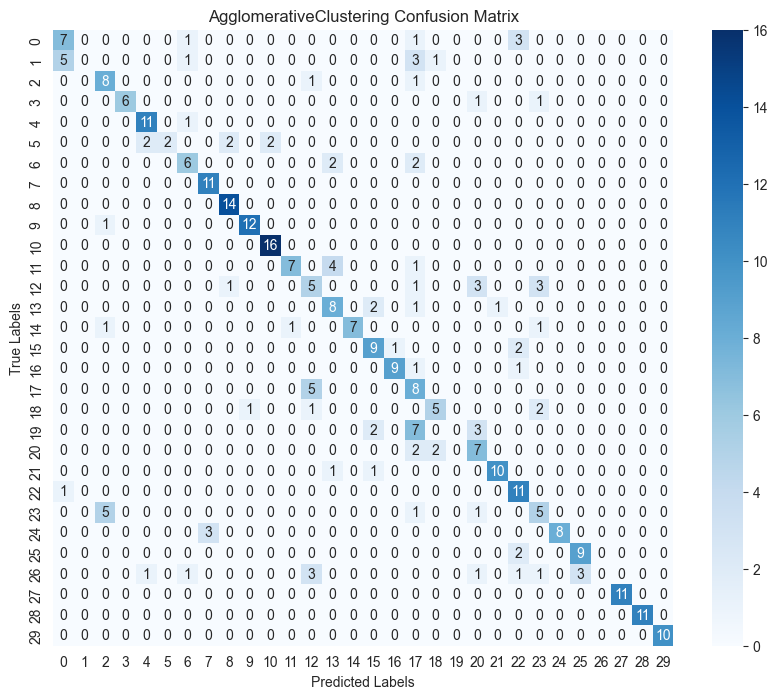

In [56]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

header = []
header.append("label")
header.append("ex_label")

for i in range(14):
    header.append("Feature " + str(i+1))
    
df1 = pd.read_csv("leaves.csv", header=None)
df1.columns = header

df2 = pd.read_csv('leaf_hog_lbp_features.csv')

df = pd.merge(df1, df2, on=['label', 'ex_label'])

y = df.pop("label")
y = np.array(y)
class_samples = df.pop("ex_label")

unique_labels = np.unique(y)

label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
y = np.vectorize(label_mapping.get)(y)

# Assuming the label column is named 'label'
X = df

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pca = PCA(n_components=0.95)  # Adjust n_components as needed
# X_scaled = pca.fit_transform(X_scaled)

# List of clustering algorithms to try
clustering_algorithms = [
    KMeans(n_clusters=30, random_state=42, n_init=20),
    AgglomerativeClustering(n_clusters=30),
    DBSCAN(eps=2.5, min_samples=5)
]

# Dictionary to store results
results = {}

def map_clusters_to_labels(y_true, y_pred):
    labels = np.unique(y_true)
    clusters = np.unique(y_pred)
    matrix = np.zeros((len(labels), len(clusters)))

    for i, label in enumerate(labels):
        for j, cluster in enumerate(clusters):
            matrix[i, j] = np.sum((y_true == label) & (y_pred == cluster))

    return np.argmax(matrix, axis=0)

for algorithm in clustering_algorithms:
    name = type(algorithm).__name__
    algorithm.fit(X_scaled)
    
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_
    else:
        y_pred = algorithm.predict(X_scaled)
    
    if len(np.unique(y_pred)) == 1:
        print(f'{name} did not find any clusters.')
        continue

    # Calculate silhouette score
    if len(np.unique(y_pred)) > 1:
        silhouette = silhouette_score(X_scaled, y_pred)
    else:
        silhouette = -1

    # Map clusters to true labels
    cluster_to_label_map = map_clusters_to_labels(y, y_pred)
    y_pred_mapped = np.array([cluster_to_label_map[cluster] for cluster in y_pred])

    # Calculate confusion matrix and accuracy
    conf_matrix = confusion_matrix(y, y_pred_mapped)
    accuracy = accuracy_score(y, y_pred_mapped)

    # Store results
    results[name] = {
        'confusion_matrix': conf_matrix,
        'accuracy': accuracy,
        'silhouette_score': silhouette
    }

for name, result in results.items():
    print(f'{name} - Accuracy: {result["accuracy"]}, Silhouette Score: {result["silhouette_score"]}')
    plt.figure(figsize=(10, 8))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


DBSCAN did not find any clusters.
KMeans - Accuracy: 0.6352941176470588, Silhouette Score: 0.08869227933873192


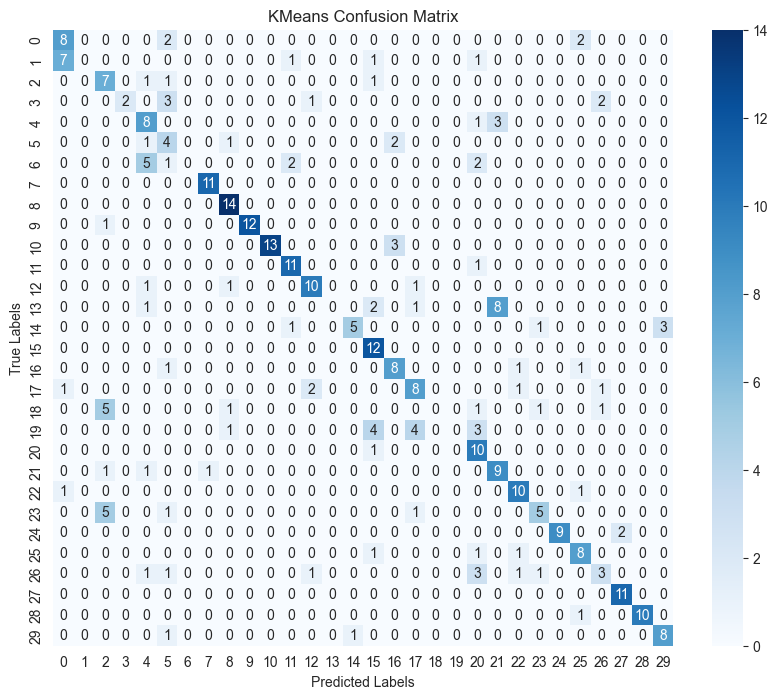

AgglomerativeClustering - Accuracy: 0.6852941176470588, Silhouette Score: 0.09290624713834027


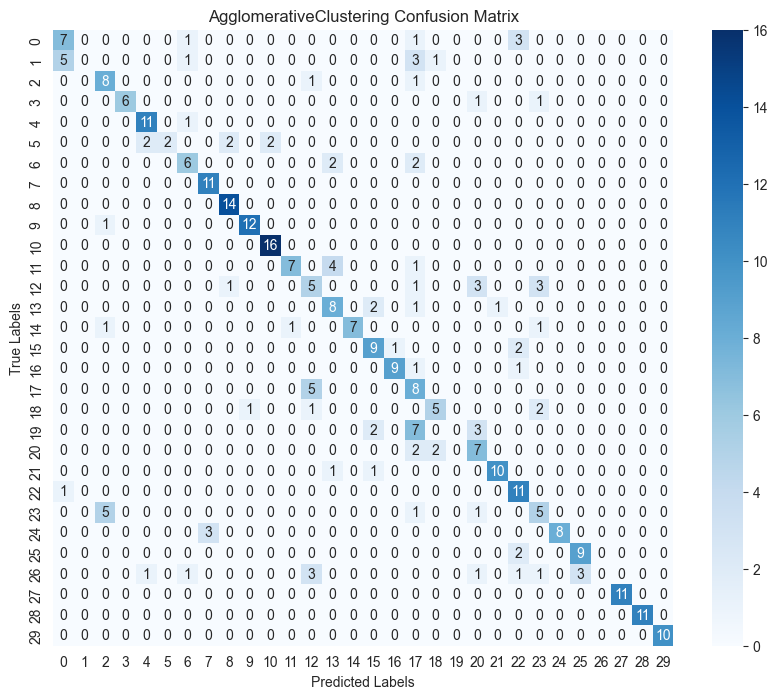

GaussianMixture - Accuracy: 0.6058823529411764, Silhouette Score: 0.0786121524800283


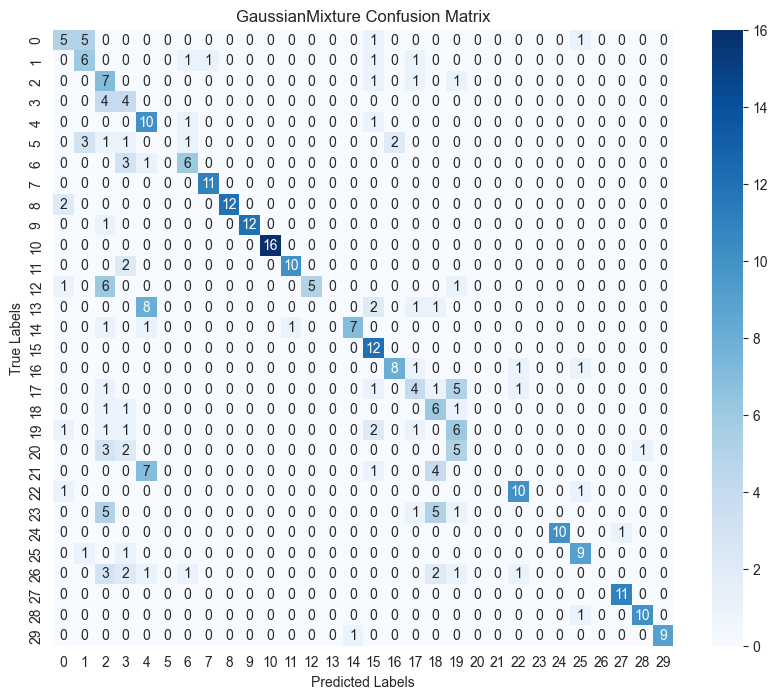

In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import confusion_matrix, accuracy_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture

# Load and preprocess data (as in your code snippet)
# Ensure X_scaled and y are defined appropriately from your dataset

header = []
header.append("label")
header.append("ex_label")

for i in range(14):
    header.append("Feature " + str(i+1))
    
df1 = pd.read_csv("leaves.csv", header=None)
df1.columns = header

df2 = pd.read_csv('leaf_hog_lbp_features.csv')

df = pd.merge(df1, df2, on=['label', 'ex_label'])

y = df.pop("label")
y = np.array(y)
class_samples = df.pop("ex_label")

unique_labels = np.unique(y)

label_mapping = {old_label: new_label for new_label, old_label in enumerate(unique_labels)}
y = np.vectorize(label_mapping.get)(y)

# Assuming the label column is named 'label'
X = df

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# pca = PCA(n_components=0.95)  # Adjust n_components as needed
# X_scaled = pca.fit_transform(X_scaled)

# List of clustering algorithms to try
clustering_algorithms = [
    KMeans(n_clusters=30, random_state=42, n_init=20),
    AgglomerativeClustering(n_clusters=30),
    DBSCAN(eps=2.5, min_samples=5),
    GaussianMixture(n_components=30, random_state=42)
]

# Dictionary to store results
results = {}

def map_clusters_to_labels(y_true, y_pred):
    labels = np.unique(y_true)
    clusters = np.unique(y_pred)
    matrix = np.zeros((len(labels), len(clusters)))

    for i, label in enumerate(labels):
        for j, cluster in enumerate(clusters):
            matrix[i, j] = np.sum((y_true == label) & (y_pred == cluster))

    return np.argmax(matrix, axis=0)

# Evaluate each clustering algorithm
for algorithm in clustering_algorithms:
    name = type(algorithm).__name__
    
    if name == 'GaussianMixture':
        algorithm.fit(X_scaled)
        y_pred = algorithm.predict(X_scaled)
        # For GMM, we use the probabilities to assign labels
        y_pred = np.argmax(algorithm.predict_proba(X_scaled), axis=1)
    else:
        algorithm.fit(X_scaled)
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_
        else:
            y_pred = algorithm.predict(X_scaled)
    
    if len(np.unique(y_pred)) == 1:
        print(f'{name} did not find any clusters.')
        continue

    # Calculate silhouette score
    if len(np.unique(y_pred)) > 1:
        silhouette = silhouette_score(X_scaled, y_pred)
    else:
        silhouette = -1

    # Map clusters to true labels
    cluster_to_label_map = map_clusters_to_labels(y, y_pred)
    y_pred_mapped = np.array([cluster_to_label_map[cluster] for cluster in y_pred])

    # Calculate confusion matrix and accuracy
    conf_matrix = confusion_matrix(y, y_pred_mapped)
    accuracy = accuracy_score(y, y_pred_mapped)

    # Store results
    results[name] = {
        'confusion_matrix': conf_matrix,
        'accuracy': accuracy,
        'silhouette_score': silhouette
    }

# Display results for each algorithm
for name, result in results.items():
    print(f'{name} - Accuracy: {result["accuracy"]}, Silhouette Score: {result["silhouette_score"]}')
    plt.figure(figsize=(10, 8))
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
